# **ECS7020P Mini-Project Submission: Advanced Component**

# 1 Author
Student Name: Malaika Phoplankar

Student ID: 230856820

# 2 Problem formulation
In our MLEnd Yummy Dataset, we have 3,250 enriched images of various meals that have been eaten and rated on multiple factors such as enjoyment as well as healthiness.

There may be a middle-ground where the healthiness of a dish is subjective depending on who you ask however there are some universally agreed upon rules about what foods are healthy. We should be eating plenty of fruits and vegetables and avoiding overconsumption of high-fat foods.

What colours does the idea of a healthy meal invoke in your mind? Can the average person tell how healthy a dish is just from looking at it? Better yet, can a computer tell a healthy a dish is based on visuals alone?

I would like to build a machine learning pipeline that takes a photo of a dish as input and outputs a prediction of what healthiness rating the dish has been assigned, with a focus on extracting features from the image relating to the colour palette. We tend to associate certain colours with markers of healthiness; green may represent vegetable elements of a dish whereas brown may represent dark meat or chocolate.

The target classes will be the five types of healthiness ratings using their assigned integers: 'very_healthy' (or 5), 'healthy' (4), 'neutral' (3), 'unhealthy' (2) and 'very_unhealthy' (1).


# 3 Machine Learning pipeline
**1) Input: whole MLEnd Yummy Dataset (raw data)**

**2) Creation of training and validation sets**

The raw data will be separated into training and validation sets.

**3) Data Preprocessing**\
At this stage null or missing values from the inputted raw data will be dealt with.


**4) Transformation: Resizing Images**

Images from both training and validation sets transformed to a more uniform size 200x200 pixels.

**5) Feature Extraction**

Extraction of the six colour components will be carried out on both the training and validation sets: green, red, dark brown, orange, yellow and white. This transformation will reduce the dimensionality of the data.

**6) Model Training**

Application of LinearSVC model to transformed data.

**7) Model Evaluation**

The model is then assessed by using validation accuracy. The performance of the model will then be illustrated through the plotting of a confusion matrix, particularly the per-class performances.

**8) Output: Prediction Accuracy (in percentages)**

# 4 Transformation stage
Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

Resizing the images This transformation was carried out as the images were of varying sizes since they are coming from various device types. In this transformation, the images are all resized with the addition of a black bar if necessary so that they are all 200x200 pixels (square-shaped).

To solve this machine learning problem, we want to extract features pertaining to particular colour components of the images. Six colour features will be extracted from each image for our model: green, red, dark brown, orange, yellow and white.

# 5 Modelling
#### Considered models

**Linear Support Vector Classification**\
LinearSVC works well in high-dimensional spaces but may not perform well if the classes are not linearly separable.

**Random Forest Classification**\
This model handles non-linear relationships well but is difficult to interpret.\

**Convolutional Neural Network (CNN)**\
CNNs are well-suited for image classification tasks and works well with large datasets though it does require a large amount of computational power.

#### Final model decision
For this ML problem, we will be using a linearSVC model since we are dealing with many extracted features.

# 6 Methodology
Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

The LinearSVC model works by finding a hyperplane that distinguishes and separates the different classes in the feature space, with the aim to find the boundary with the most separation between the itself and the closest points from each class. The data points near the hyperplane are referred to as support vectors and these are the points that aid the algorithm in finding the optimal hyperplane. The 'C' value is parameter in LinearSVC models that regulates the balance between minimising training error and testing error. The risk of smaller C values is that the model may misclassify some training points because the boundary is simpler whereas the risk for a larger C is that is more heavily penalises misclassifications. The C value will be determined by carrying out a grid search to determine what C value to use for our model.

After training and validating the model, its performance will be assessed by the use of validation accuracy and confusion matrix. The confusion matrix will illustrate per-class performance to give us a better idea of how accurately the model is predicting each class.

# 7 Dataset
Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

The full dataset, which we will be using for this pipeline, is a collection of 3,250 images. These enriched images are downloaded along with the complimentary csv file containing attributes such as the following: name of the dish; whether it is homemade or not, and if it was not then the restaurant or establishment from which it was purchased from is specified;	cuisine; list of ingredients;	diet;	rating of how healthy the dish is; overall enjoyment of the dish;	specification of whether it contains rice or chips. For our ML problem, we will be focusing on the Healthiness_rating and Healthiness_rating_int columns, the latter which will be our label.

In [3]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.1 MB/s eta 0:00:00


In [4]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#datadir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd', verbose=1)
subset = {}
datadir, FILE_ERROR = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd',
                                 subset = subset,verbose=1,overwrite=False,debug_mode=True)
datadir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [6]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [7]:
null_values = MLENDYD_df[MLENDYD_df.isnull().any(axis=1)]
null_values

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000331.jpg,vegetarian,indian,indian,veg_biyani,home,rice,NaN,NaN,NaN,NaN,Train
001153.jpg,vegan,NaN,NaN,tofu_salad_pitta,home,"pitta_bread,peppers,onion,red_cabbage,firm_tof...",very_healthy,5.0,like,4.0,Train
001442.jpg,vegetarian,indian,indian,veg_meal,home,"rice,dal,flour,onion,chillies,pickle",very_healthy,5.0,NaN,NaN,Train
001528.jpg,vegetarian,NaN,NaN,porridge,home,"milk,oats,honey",healthy,4.0,like,4.0,Train
001805.jpg,vegetarian,NaN,NaN,"peanut_butter_and_strawberry_jam_sandwich,with...",home,"50/50_bread,peanut_butter,strawberry_jam,origi...",neutral,3.0,like,4.0,Train
002063.jpg,vegetarian,chinese,chinese,veg_dumplings,restaurant,"all_purpose_flour,finely_chopped_vegetables,salt",healthy,4.0,NaN,NaN,Test
002602.jpg,non_vegetarian,north_indian,north_indian,chicken_lollypop_and_chicken_tikka,restaurant,"chicken,sunflower_oil,indian_spices,salt",neutral,3.0,NaN,NaN,Train
002707.jpg,vegetarian,NaN,NaN,oats,home,"oats,milk,honey,bananas",healthy,4.0,strongly_like,5.0,Test
002889.jpg,non_vegetarian,NaN,NaN,chicken_balti_sub,restaurant,"chicken,_flour,water,yeast,sugar,salt,egg,turm...",healthy,4.0,like,4.0,Train


The table above illustrates the missing values in our dataset and which columns they appear in. They will need to be dealt with accordingly during the data cleaning stage.

### Creation of training and validation sets

We will now separate the data into two subsets: one for training and one for validation.\
First, let us look at how many values we have in each category for the feature we want to predict (Healthiness_rating_int):

In [9]:
health_rating_counts = MLENDYD_df['Healthiness_rating_int'].value_counts()
health_rating_counts

4.0    1268
3.0     785
5.0     607
2.0     467
1.0     123
Name: Healthiness_rating_int, dtype: int64

In [10]:
TrainSet, TestSet, Maps = yummy_load(datadir_main=datadir, encode_labels=True)

Total 3250 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/


In [11]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [12]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [13]:
Maps

{'Diet': {'non_vegetarian': 0, 'vegan': 1, 'vegetarian': 2},
 'Home_or_restaurant': {'home': 0, 'restaurant': 1},
 'Healthiness_rating': {'very_unhealthy': 1,
  'unhealthy': 2,
  'neutral': 3,
  'healthy': 4,
  'very_healthy': 5},
 'Likeness_int': {'strongly_dislike': 1,
  'dislike': 2,
  'neutral': 3,
  'like': 4,
  'strongly_like': 5}}

In [14]:
#Extract healthiness (integer) labels from training and testing sets
Y_train = [label[2] for label in TrainSet['Y_encoded']]
Y_test = [label[2] for label in TestSet['Y_encoded']]
len(Y_test)

975

The code below deals with null values present in the datasets.

In [15]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

X_train_paths = np.array(X_train_paths)
Y_train = np.array(Y_train)
mask_tr = ~np.isnan(Y_train)

X_train_paths_filtered = X_train_paths[mask_tr]
Y_train_filtered = Y_train[mask_tr]

X_test_paths = np.array(X_test_paths)
Y_test = np.array(Y_test)
mask_ts = ~np.isnan(Y_test)

len(Y_test)
X_test_paths_filtered = X_test_paths[mask_ts]
Y_test_filtered = Y_test[mask_ts]

Very unhealthy dishes


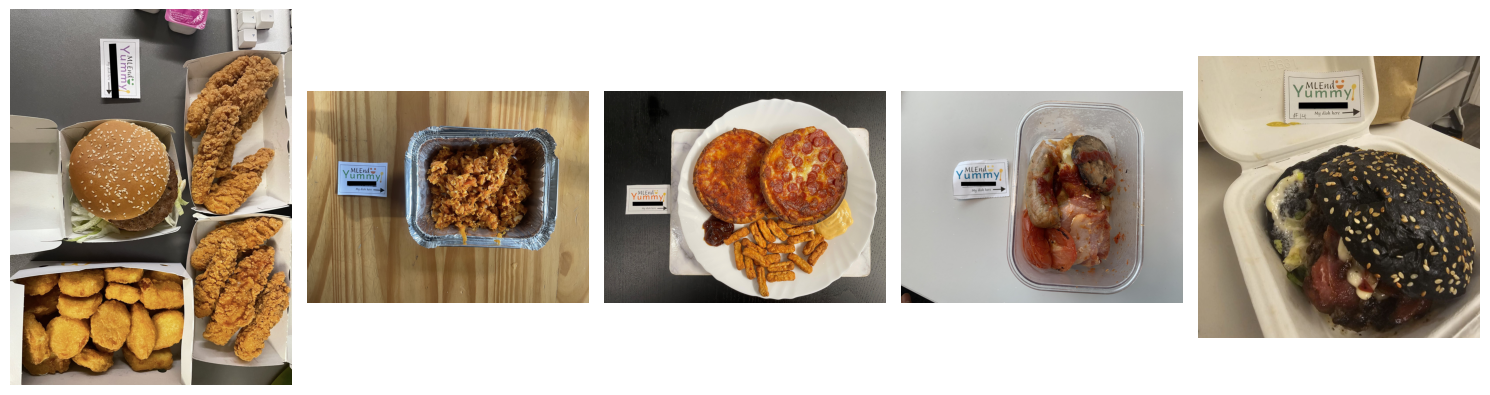

Healthy dishes


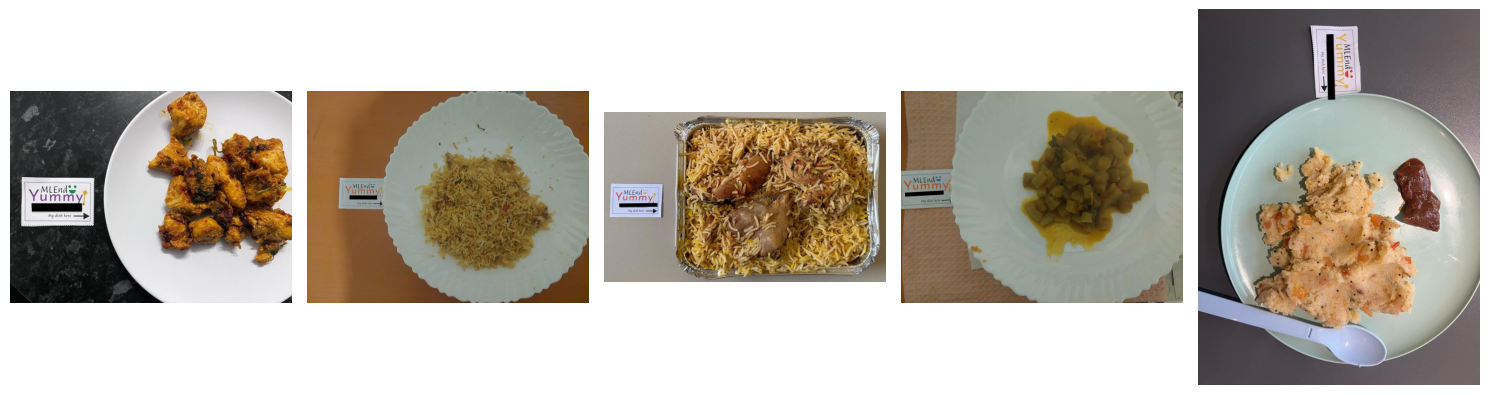

In [16]:
very_unhealthy_Img = np.array(X_train_paths)[Y_train==1.0]
# unhealthy_Img = np.array(X_train_paths)[Y_train==2.0]
# neutral_Img = np.array(X_train_paths)[Y_train==3.0]
healthy_Img = np.array(X_train_paths)[Y_train==4.0]
# very_healthy_Img = np.array(X_train_paths)[Y_train==5.0]

print('Very unhealthy dishes')
plt.figure(figsize=(15,5))
for k,file in enumerate(very_unhealthy_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Healthy dishes')
plt.figure(figsize=(15,5))
for k,file in enumerate(healthy_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

## Transformation: resizing
As you can see from the plotted images above, the images are of various sizes and need to be made more uniform. The code below resizes the images.

In [17]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [18]:
X_train_with_filename = []
for k,file in enumerate(X_train_paths_filtered):
  sp.utils.ProgBar_JL(k,len(X_train_paths_filtered),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train_with_filename.append((file, I))

X_test_with_filename = []
for k,file in enumerate(X_test_paths_filtered):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test_with_filename.append((file, I))

X_train_with_filename = np.array(X_train_with_filename, dtype=object)
X_test_with_filename = np.array(X_test_with_filename, dtype=object)
X_train_with_filename.shape, X_test_with_filename.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|2274\2274|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|975\975|
Done!


((2274, 2), (975, 2))

### Feature Extraction
For the following section, we will be extracting:

In [35]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import feature

def get_red_component(I, t1_low=0, t2_high=10):
    I_8bit = cv2.convertScaleAbs(I)
    Ihsv = cv2.cvtColor(I_8bit, cv2.COLOR_RGB2HSV)
    mask_low = (Ihsv[:,:,0]>=0) & (Ihsv[:,:,0]<=t1_low)
    mask_high = (Ihsv[:,:,0]>=180-t2_high) & (Ihsv[:,:,0]<=180)
    mask = mask_low | mask_high
    Rpx = np.sum(mask.astype(int))
    return Rpx

def get_yellow_component(I, t1_low=20, t2_high=30):
    I_8bit = cv2.convertScaleAbs(I)
    Ihsv = cv2.cvtColor(I_8bit, cv2.COLOR_RGB2HSV)
    mask = (Ihsv[:,:,0]>=t1_low) & (Ihsv[:,:,0]<=t2_high)
    Ypx = np.sum(mask.astype(int))
    return Ypx

def get_green_component(I, t1_low=60, t2_high=120):
    I_8bit = cv2.convertScaleAbs(I)
    Ihsv = cv2.cvtColor(I_8bit, cv2.COLOR_RGB2HSV)
    mask = (Ihsv[:,:,0]>=t1_low) & (Ihsv[:,:,0]<=t2_high)
    Gpx = np.sum(mask.astype(int))
    return Gpx

I had made some functions for additional colour component extractions (see below) but it gave only null values for some reason and I did not have time to revise these so I have omitted it from the pipeline.

In [36]:
def get_orange_component(I, t1_low=5, t2_high=20):
    I_8bit = cv2.convertScaleAbs(I)
    Ihsv = cv2.cvtColor(I_8bit, cv2.COLOR_RGB2HSV)
    mask = (Ihsv[:,:,0]>=t1_low) & (Ihsv[:,:,0]<=t2_high)
    Opx = np.sum(mask.astype(int))
    return Opx

def get_brown_component(I, t1_low=10, t1_high=20, t2_low=20, t2_high=30):
    I_8bit = cv2.convertScaleAbs(I)
    Ihsv = cv2.cvtColor(I_8bit, cv2.COLOR_RGB2HSV)
    mask = ((Ihsv[:,:,0]>=t1_low) & (Ihsv[:,:,0]<=t1_high) &
            (Ihsv[:,:,1]>=t2_low) & (Ihsv[:,:,1]<=t2_high))
    Bpx = np.sum(mask.astype(int))
    return Bpx

def get_white_component(I, s_low=0, v_high=255):
    I_8bit = cv2.convertScaleAbs(I)
    Ihsv = cv2.cvtColor(I_8bit, cv2.COLOR_RGB2HSV)
    mask = (Ihsv[:, :, 1] >= s_low) & (Ihsv[:, :, 2] <= v_high)
    Wpx = np.sum(mask.astype(int))
    return Wpx

In [37]:
X_train_f = []
for k, I in enumerate(X_train_with_filename):
  f1 = get_red_component(I[1])
  f2 = get_yellow_component(I[1])
  f3 = get_green_component(I[1])
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test_with_filename):
  f1 = get_red_component(I[1])
  f2 = get_yellow_component(I[1])
  f3 = get_green_component(I[1])
  X_test_f.append([f1,f2,f3])

In [38]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

# X_train_paths_filtered = X_train_paths[mask_tr]
# Y_train_filtered = Y_train[mask_tr]
# X_test_paths_filtered = X_test_paths[mask_ts]
# Y_test_filtered = Y_test[mask_ts]

((2274, 3), (975, 3))

### Normalisation

Following feature extraction, the dimensionality of the data has been reduced and we are now only dealing with 6 attributes for each image as opposed to the 120,000 data points (200x200x3) we had before.

We can now look normalising the data so that the points fall within a similar range.

In [39]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN) / SD
X_test_fn = (X_test_f - MEAN) / SD

The code below is just to check whether there are still null values from the issue I had mentioned earlier with the other considered features.

In [40]:
print("Test array for NaN...", np.isnan(X_train_fn))
print("Test array for NaN...", np.isnan(X_test_fn))

Test array for NaN... [[False False False]
 [False False False]
 [False False False]
 ...
 [False False False]
 [False False False]
 [False False False]]
Test array for NaN... [[False False False]
 [False False False]
 [False False False]
 ...
 [False False False]
 [False False False]
 [False False False]]


# 8 Results

In [41]:
def showConfMat(CM, labels=['very_unhealthy', 'unhealthy', 'neutral', 'healthy', 'very_healthy']):
    plt.matshow(CM, cmap='Blues')
    for i in range(CM.shape[0]):
        for j in range(CM.shape[1]):
            plt.text(j, i, str(CM[i, j]), ha='center', va='center')
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Training Accuracy:	 0.386103781882146
Test Accuracy:	 0.40102564102564103


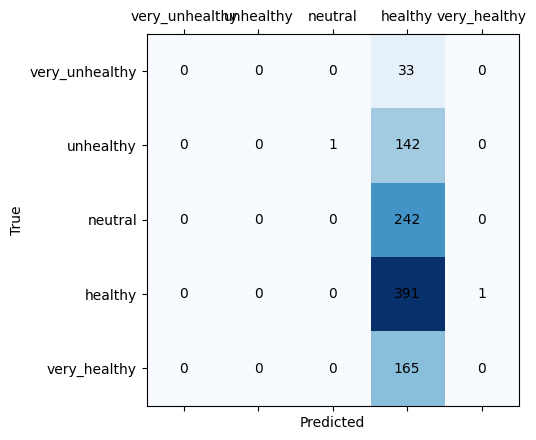

In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score

base_model = LinearSVC(C=1, random_state=42, max_iter=10000)

model = OneVsRestClassifier(base_model)

model.fit(X_train_fn, Y_train_filtered)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp == Y_train_filtered)
test_accuracy = np.mean(ysp == Y_test_filtered)

print('Training Accuracy:\t', train_accuracy)
print('Test Accuracy:\t', test_accuracy)

conf_mat = confusion_matrix(Y_test_filtered, ysp)
showConfMat(conf_mat)

# 9 Conclusions
As illustrated in the confusion matrix, the model has labelled almost all of the points, with the exception of the two points, as "healthy". This is likely due to the imbalance of data points across. To resolve this issue, I perhaps should have used stratified sampling to decide how to split the dataset. Another suggestion is that I could have also used a different type of model, such as a CNN, which are maybe better suited for handling images. I also could have used a different metric of evaluation more suited for imbalanced classification tasks. Particularly in this case, accuracy is not the best way to evaluate the model based on an imbalanced dataset. In the validation set, if the model is to label each data point as "healthy", the largest class, it will be approximately 40% right, which why the test accuracy is 40% as well.

One issue may be the variability in backgrounds between the images, since the images have been taken from different sources. The background of the dish, as well as the plate that the dish is served on contribute and are included in the extracted colour component, thus interfering with the amount of each of the colours appearing in the actual dish. To resolve this issue, during the data collection itself the dishes must be pictured on more uniform plating and uniform backgrounds.

Another issue may be that the data is unevenly ditributed between the classes which is why the model is likely to better at predicting the classes with more values in the dataset. Thus, to improve this, we should use a dataset with a more even distribution across the classes.

To conclude, I think that the colour components of a dish are poor predictors of how healthy the dish is and there are certainly better options for models to explore this problem further.